# Workshop 3: Handwritten digit classification
In this workshop we will learn how to train a neural network with images
as input to classify hand-written digits
([info of the data](http://yann.lecun.com/exdb/mnist/)). The main blocks of the workshop are:

1. Get the data from Keras repository and visualize it.
2. Pre-process the data.
3. Design the network.
4. Train the network.
5. Evaluate the model.

# 1. Get the data from Keras repository and visualize it.

In [1]:
# Import dependence to download the dataset
from tensorflow import keras
from keras.datasets import mnist

In [2]:
# The data, shuffled and split between train and testval sets
(X_train, y_train), (X_testval, y_testval) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Import dependence for handling arrays
import numpy as np

In [4]:
# Show the shape of the data partitions
print("X_train original shape:", X_train.shape)
print("y_train original shape:", y_train.shape)
print("X_testval original shape:", X_testval.shape)
print("y_testval original shape:", y_testval.shape)

X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
X_testval original shape: (10000, 28, 28)
y_testval original shape: (10000,)


In [5]:
# Show the data type of the data partitions
print("X_train original dtype:", X_train.dtype)
print("y_train original dytpe:", y_train.dtype)
print("X_testval original dtype:", X_testval.dtype)
print("y_testval original dtype:", y_testval.dtype)

X_train original dtype: uint8
y_train original dytpe: uint8
X_testval original dtype: uint8
y_testval original dtype: uint8


In [6]:
# Show the data range of the data partitions
print("X_train original min value:", X_train.min())
print("X_train original max value:", X_train.max())
print("X_testval original min value:", X_testval.min())
print("X_testval original max value:", X_testval.max())

X_train original min value: 0
X_train original max value: 255
X_testval original min value: 0
X_testval original max value: 255


In [7]:
# Show the different labels of the data partitions
print("y_train labels: \n", np.unique(y_train))
print("y_testval labels: \n", np.unique(y_testval))

y_train labels: 
 [0 1 2 3 4 5 6 7 8 9]
y_testval labels: 
 [0 1 2 3 4 5 6 7 8 9]


In [8]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for
                                          # appropriate visualization

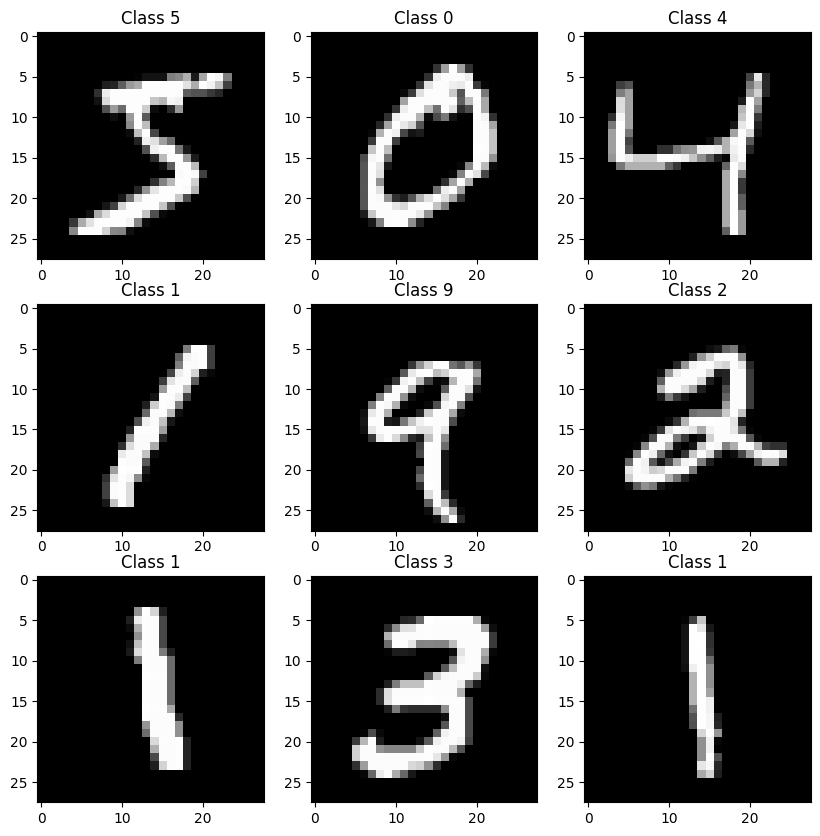

In [9]:
# Show 9 images with its respective ground truth labels
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# 2. Pre-process the data.


In [10]:
# Convert the 2D images to 1D array
X_train_rs = X_train.reshape(60000, 784)  # 784 = 28*28
X_testval_rs = X_testval.reshape(10000, 784)

In [11]:
# Show shape of the reshaped dataset
print("Training matrix shape:", X_train_rs.shape)
print("Testing matrix shape:", X_testval_rs.shape)

Training matrix shape: (60000, 784)
Testing matrix shape: (10000, 784)


In [12]:
# Convert dtype to float32
X_train_fl = X_train_rs.astype('float32')
X_testval_fl = X_testval_rs.astype('float32')

In [13]:
# Show dtype of the dataset
print("Training matrix dtype:", X_train_fl.dtype)
print("Testing matrix dtype:", X_testval_fl.dtype)

Training matrix dtype: float32
Testing matrix dtype: float32


In [14]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl /= 255
X_testval_fl /= 255

In [15]:
# Show the range of pixels
print("Training matrix range:", "[", X_train_fl.min(), ",", X_train_fl.max(), "]")
print("Testing matrix range:", "[", X_testval_fl.min(), ",", X_testval_fl.max(), "]")

Training matrix range: [ 0.0 , 1.0 ]
Testing matrix range: [ 0.0 , 1.0 ]


In [16]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [17]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(60000, 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(10000, 1)).toarray()

In [18]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (60000, 10)
Testing one-hot encoded labels shape: (10000, 10)


In [19]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [20]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 784)
Testing matrix shape: (5000, 784)


# 3. Design the network.


In [21]:
# Import dependencies for network dessign
from keras.models import Model
from keras.layers import Input, Dense

In [22]:
# Define the model
input_layer = Input(shape=(X_train_fl.shape[1],))
hidden_layer = Dense(32, activation='relu')(input_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)
model= Model(inputs=input_layer, outputs=output_layer)

In [23]:
# Show a summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 4. Train the network.


In [25]:
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
469/469 [==============================] - 9s 8ms/step - loss: 0.4976 - accuracy: 0.8658 - val_loss: 0.3466 - val_accuracy: 0.9012
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2502 - accuracy: 0.9306 - val_loss: 0.2716 - val_accuracy: 0.9228
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2018 - accuracy: 0.9432 - val_loss: 0.2362 - val_accuracy: 0.9324
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1734 - accuracy: 0.9508 - val_loss: 0.2140 - val_accuracy: 0.9378
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1537 - accuracy: 0.9567 - val_loss: 0.1903 - val_accuracy: 0.9440
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1386 - accuracy: 0.9607 - val_loss: 0.1839 - val_accuracy: 0.9468
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1277 - accuracy: 0.9641 - val_loss: 0.1721 - val_accuracy: 0.9486
Epoch 

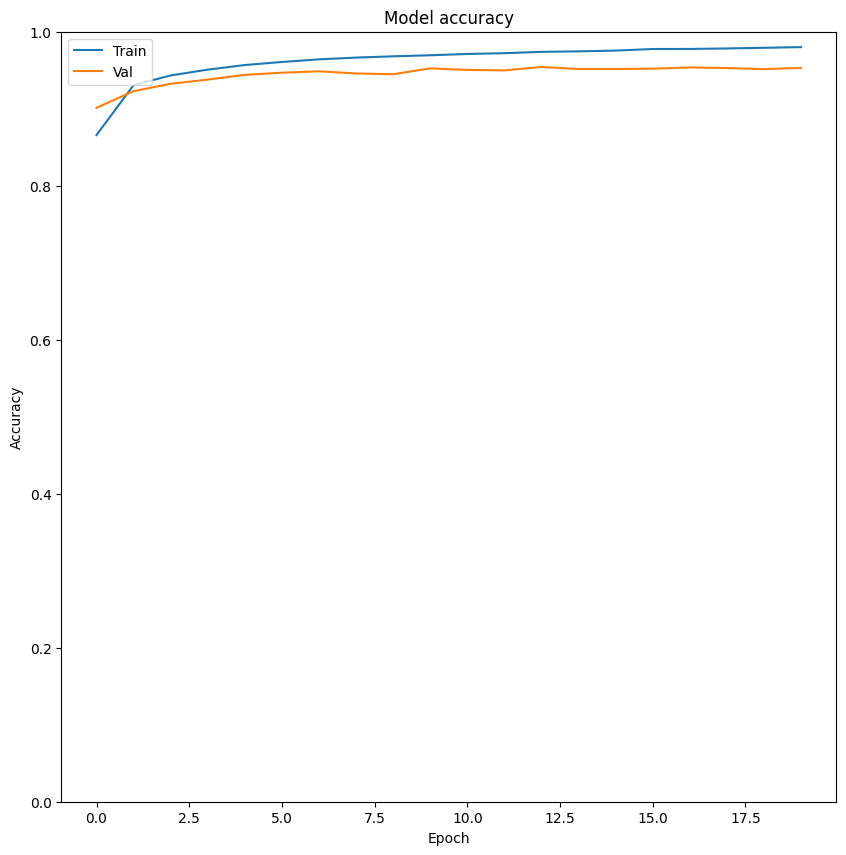

In [26]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

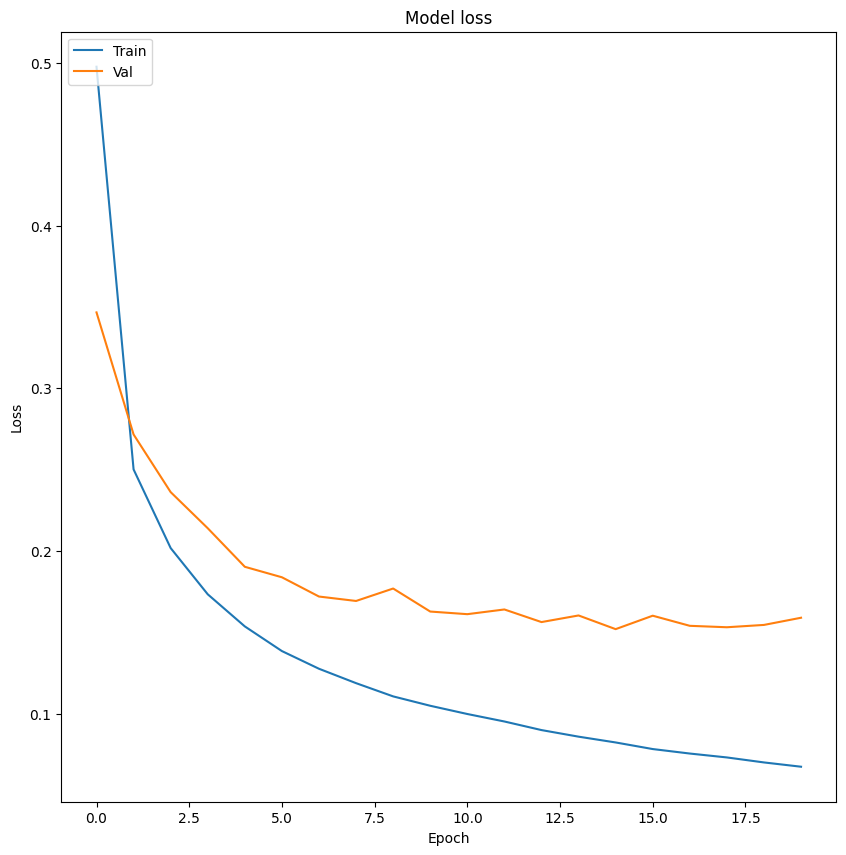

In [27]:
# Plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [28]:
# Save the model
from pathlib import Path
path = Path('./models')
path.mkdir()
model.save('./models/model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 5. Evaluate the model.

In [29]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.08176057785749435
Test accuracy: 0.9746000170707703


In [30]:
# Predict test samples post-process them
predicted_classes = model.predict(X_test)
# predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(predicted_classes, axis=1)

157/157 [==============================] - 0s 2ms/step


In [31]:
# Convert test labels to scalars
y_test_scalar = np.argmax(y_test, axis=1)

In [32]:
# Obtain test samples correctly predicted
correct_indices = np.nonzero(predicted_classes == y_test_scalar)[0]

In [33]:
# Obtain test samples incorrectly predicted
incorrect_indices = np.nonzero(predicted_classes != y_test_scalar)[0]

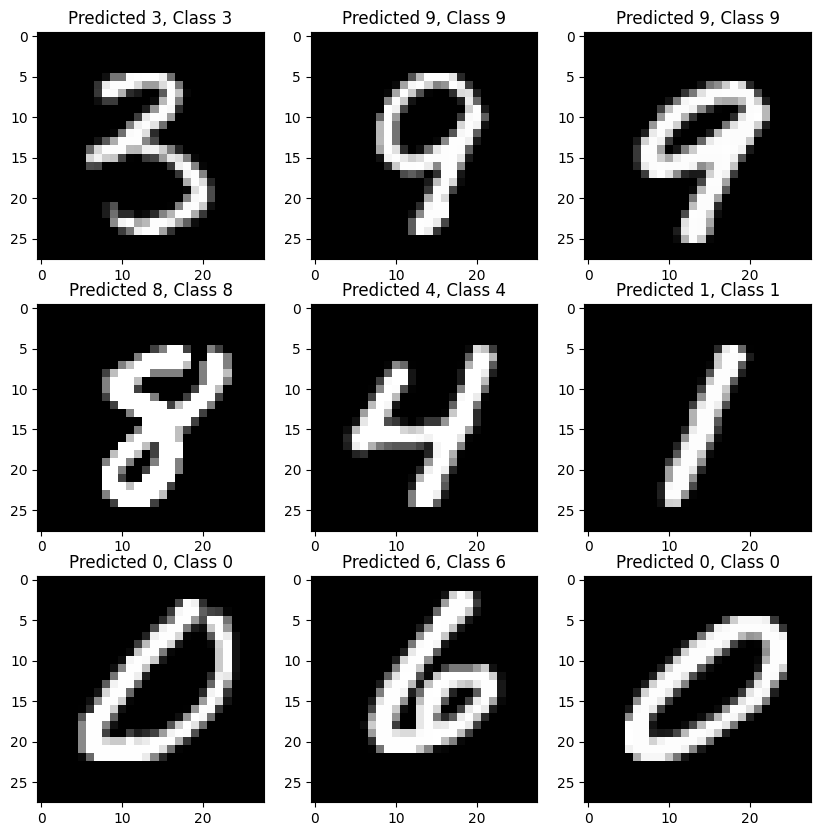

In [34]:
# Show some correctly classified samples
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray',
               interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct],
                                              y_test_scalar[correct]))

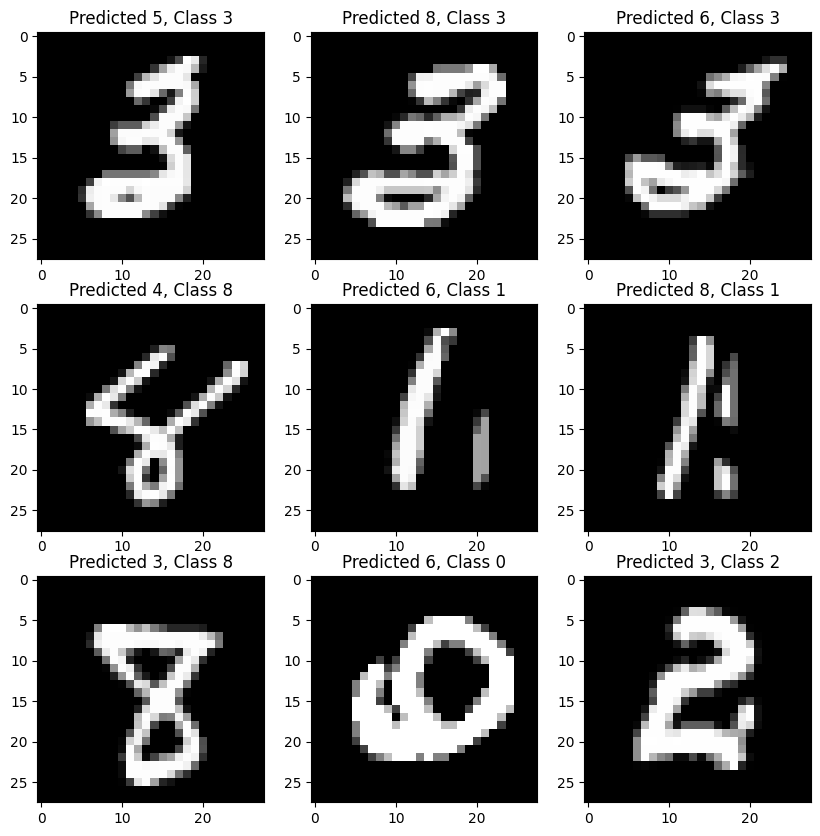

In [35]:
# Show some incorrectly classified samples
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray',
               interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect],
                                              y_test_scalar[incorrect]))

# Exercise 1: Create a new model with 512 neurons in the hidden layer and repeat the process

In [51]:
# Importa las dependencias necesarias para diseñar el modelo
from keras.models import Model
from keras.layers import Input, Dense

# Define el modelo con 512 neuronas en la capa oculta
input_layer = Input(shape=(X_train_fl.shape[1],))
hidden_layer = Dense(512, activation='relu')(input_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)
new_model = Model(inputs=input_layer, outputs=output_layer)


In [52]:
# Muestra un resumen del modelo
new_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# Compila el nuevo modelo
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [54]:
# Entrena el nuevo modelo
history_new = new_model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.2703 - accuracy: 0.9232 - val_loss: 0.1889 - val_accuracy: 0.9422
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1091 - accuracy: 0.9686 - val_loss: 0.1263 - val_accuracy: 0.9586
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0722 - accuracy: 0.9788 - val_loss: 0.0993 - val_accuracy: 0.9686
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0513 - accuracy: 0.9847 - val_loss: 0.0983 - val_accuracy: 0.9672
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0385 - accuracy: 0.9887 - val_loss: 0.0925 - val_accuracy: 0.9704
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0272 - accuracy: 0.9923 - val_loss: 0.0880 - val_accuracy: 0.9750
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0208 - accuracy: 0.9945 - val_loss: 0.0853 - val_accuracy: 0.9728
Epoch 

In [55]:
# Obtener las métricas en la partición de prueba
score_new = new_model.evaluate(X_test, y_test, verbose=0)
print('Test score (loss):', score_new[0])
print('Test accuracy:', score_new[1])


Test score (loss): 0.037974558770656586
Test accuracy: 0.9914000034332275


# Exercise 2: Add a hidden layer with 512 neurons to the model of exercise 1 and repeat the process

In [56]:
# Importa las dependencias necesarias para diseñar el modelo
from keras.models import Model
from keras.layers import Input, Dense

# Define el modelo con una capa oculta adicional de 512 neuronas
input_layer = Input(shape=(X_train_fl.shape[1],))
hidden_layer1 = Dense(512, activation='relu')(input_layer)
hidden_layer2 = Dense(512, activation='relu')(hidden_layer1)
output_layer = Dense(10, activation='softmax')(hidden_layer2)
model_exercise2 = Model(inputs=input_layer, outputs=output_layer)

In [57]:
# Muestra un resumen del modelo
model_exercise2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Compila el modelo del ejercicio 2
model_exercise2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [59]:
# Entrena el modelo del ejercicio 2
history_exercise2 = model_exercise2.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.2192 - accuracy: 0.9352 - val_loss: 0.1338 - val_accuracy: 0.9582
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0795 - accuracy: 0.9752 - val_loss: 0.1152 - val_accuracy: 0.9630
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.0939 - val_accuracy: 0.9680
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.1252 - val_accuracy: 0.9600
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.1081 - val_accuracy: 0.9722
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0224 - accuracy: 0.9924 - val_loss: 0.0991 - val_accuracy: 0.9742
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.1166 - val_accuracy: 0.9706
Epoch 

In [60]:
# Obtener las métricas en la partición de prueba para el modelo del ejercicio 2
score_exercise2 = model_exercise2.evaluate(X_test, y_test, verbose=0)
print('Test score (loss) for Exercise 2:', score_exercise2[0])
print('Test accuracy for Exercise 2:', score_exercise2[1])


Test score (loss) for Exercise 2: 0.05291116237640381
Test accuracy for Exercise 2: 0.9883999824523926


# Exercise 3: Train a model with CIFAR 10 dataset

[Dataset info](https://www.cs.toronto.edu/~kriz/cifar.html)

In [46]:
# Import dependence for downloading CIFAR10
from keras.datasets import cifar10

In [47]:
(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [62]:
# Importa las dependencias necesarias
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Normaliza los datos y realiza la codificación one-hot de las etiquetas
X_train = X_train.astype('float32') / 255
X_testval = X_testval.astype('float32') / 255

onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(-1, 1)).toarray()
y_testval_oh = onehot_enc.transform(y_testval.reshape(-1, 1)).toarray()

# Muestra las formas de los datos después del preprocesamiento
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train_oh.shape)
print("X_testval shape:", X_testval.shape)
print("y_testval shape:", y_testval_oh.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_testval shape: (10000, 32, 32, 3)
y_testval shape: (10000, 10)


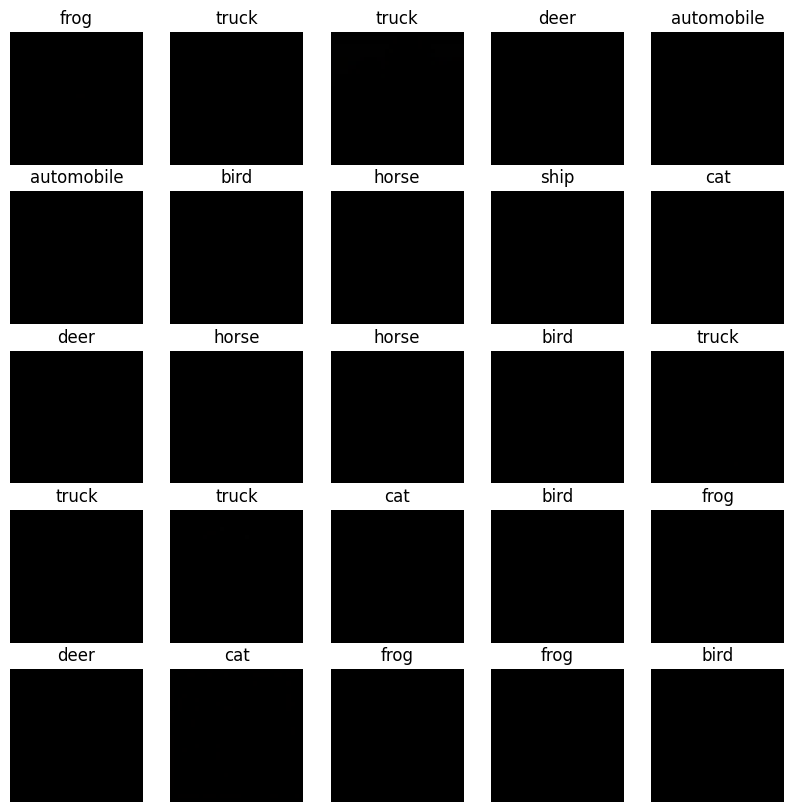

In [63]:
import matplotlib.pyplot as plt

# Define las etiquetas de las clases de CIFAR-10
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Muestra algunas imágenes de ejemplo del conjunto de entrenamiento
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(cifar10_classes[np.argmax(y_train_oh[i])])
    plt.axis('off')
plt.show()


In [64]:
# Divide el conjunto de datos en entrenamiento, validación y prueba
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_oh, test_size=0.2, random_state=42)

# Muestra las formas de los conjuntos de datos después de la división
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_testval shape:", X_testval.shape)
print("y_testval shape:", y_testval_oh.shape)

X_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 10)
X_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 10)
X_testval shape: (10000, 32, 32, 3)
y_testval shape: (10000, 10)


In [65]:
# Importa las dependencias necesarias para el diseño del modelo
from keras.models import Model
from keras.layers import Input, Flatten, Dense

# Define el modelo para clasificación de imágenes CIFAR-10
input_layer = Input(shape=(32, 32, 3))  # Tamaño de las imágenes CIFAR-10
flatten_layer = Flatten()(input_layer)
hidden_layer = Dense(512, activation='relu')(flatten_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)
cifar10_model = Model(inputs=input_layer, outputs=output_layer)

# Muestra un resumen del modelo
cifar10_model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 512)               1573376   
                                                                 
 dense_12 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1578506 (6.02 MB)
Trainable params: 1578506 (6.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
# Compila el modelo
cifar10_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo
history_cifar10 = cifar10_model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/20
313/313 [==============================] - 3s 6ms/step - loss: 2.0765 - accuracy: 0.2545 - val_loss: 1.9422 - val_accuracy: 0.3129
Epoch 2/20
313/313 [==============================] - 1s 5ms/step - loss: 1.9008 - accuracy: 0.3292 - val_loss: 1.8636 - val_accuracy: 0.3447
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 1.8453 - accuracy: 0.3477 - val_loss: 1.8302 - val_accuracy: 0.3539
Epoch 4/20
313/313 [==============================] - 1s 5ms/step - loss: 1.8039 - accuracy: 0.3650 - val_loss: 1.7820 - val_accuracy: 0.3700
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7660 - accuracy: 0.3762 - val_loss: 1.7517 - val_accuracy: 0.3759
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7325 - accuracy: 0.3899 - val_loss: 1.7263 - val_accuracy: 0.3856
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 1.7041 - accuracy: 0.3995 - val_loss: 1.6946 - val_accuracy: 0.3985
Epoch 

In [67]:
# Obtener las métricas en el conjunto de prueba
score_cifar10 = cifar10_model.evaluate(X_testval, y_testval_oh, verbose=0)
print('Test score (loss) for CIFAR-10 model:', score_cifar10[0])
print('Test accuracy for CIFAR-10 model:', score_cifar10[1])


Test score (loss) for CIFAR-10 model: 1.5244883298873901
Test accuracy for CIFAR-10 model: 0.46630001068115234
